# The Best Neighborhood in Pittsburgh
## Team: USB-Cs
### Authors
- Shinwoo Kim — SHK148@pitt.edu
- Kavin Sankar — KAS595@pitt.edu
- Jonathan Ryu JHR25@pitt.edu

## Motivation
As college students who will most likely be living off campus in our upcoming years at Pitt, we thought it would be valuable if we found the best neighborhood to live in Pittsburgh. We also wanted to inform our peers of ways to determine a good neighborhood using our metrics. 


## Metric
We decided a good way to determine which neighborhood is the best is to identify which has neighborhood was the safest and had the best quality homes. To do this, we utilized [**Pittsburgh Police Arrest Data**](https://data.wprdc.org/dataset/arrest-data), [**Pittsburgh Police Firearm Seizures**](https://data.wprdc.org/dataset/pbp-fire-arm-seizures), and [**Median Home Values**](https://data.wprdc.org/dataset/pgh/resource/9890875b-c1d1-4e64-8fc9-a4a8dc433745). We chose our metric to be that the higher amount of crimes committed (total amount of arrests and gun seizures) would result in a more dangerous neighborhood; the median home values were pretty straight forward. The best neighborhood would be tghe safest and have the best homes.

## Method

In [1]:
# load numpy, pandas, seaborn, matplotlib, geopandas, descartes, geometry
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

The above code cell loads in the libraries needed for this Notebook.

--------------------------------------------------------------------------------------------------------------------------

### Arrests

In [3]:
# load data from data set
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f") 

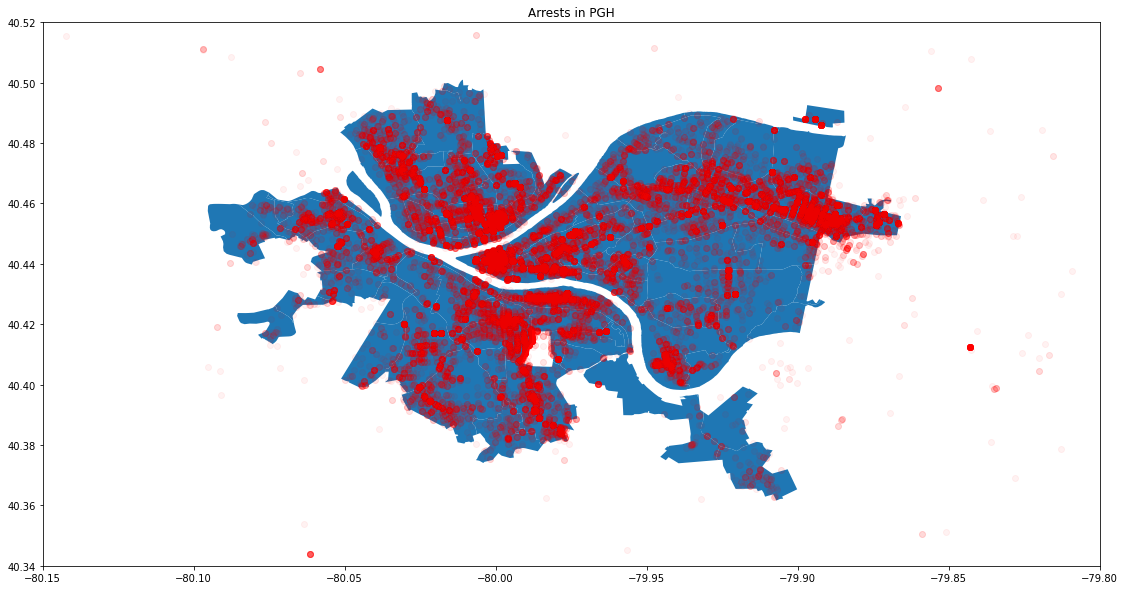

In [45]:
# load data from data set
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f") 

#import map of Pittsburgh
#source: https://spcgis-spc.hub.arcgis.com/datasets/city-of-pittsburgh-neighborhoods/explore?location=40.430850%2C-79.979850%2C12.73
pgh = gpd.read_file('Neighborhoods_.shp')

# Take coordinates from dataset and plot ontop of map
geometry = [Point(xy) for xy in zip(arrests['X'], arrests['Y'])]
geo_df = gpd.GeoDataFrame(arrests, geometry = geometry)
fig, ax = plt.subplots(figsize = (20,10))
pgh.plot(ax=ax)
plt.xlim([-80.15, -79.80])
plt.ylim([40.34,40.52])

ax.set_title('Arrests in PGH')
geo_df.plot(ax=ax, alpha = .05, color='red')
plt.show()

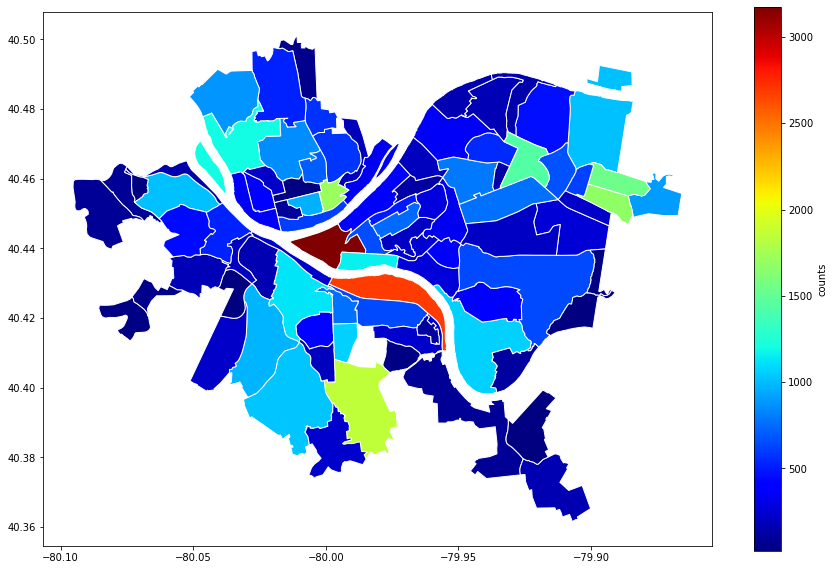

In [4]:
#Count number of crimes in each neighborhood and display as bar chart
tally = arrests['INCIDENTNEIGHBORHOOD'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
tally.sort_values(by='counts', ascending=True)

pgh = gpd.read_file('./pgh/City_of_Pittsburgh_Neighborhoods.shp')
# Merging the two dataframes
crime_map = pgh.merge(tally, how='left', left_on='HOOD', right_on='neighborhood')

# looking to confirm if it merged correctly
crime_map[['HOOD','counts','geometry']].head()

crime_map.plot(column='counts', # set the data to be used for coloring
               cmap='jet',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "counts"}, # label the legend
               figsize=(15, 10),         # set the size
               )

 We should defintely avoid Central Business District, Southside, and Carrick.

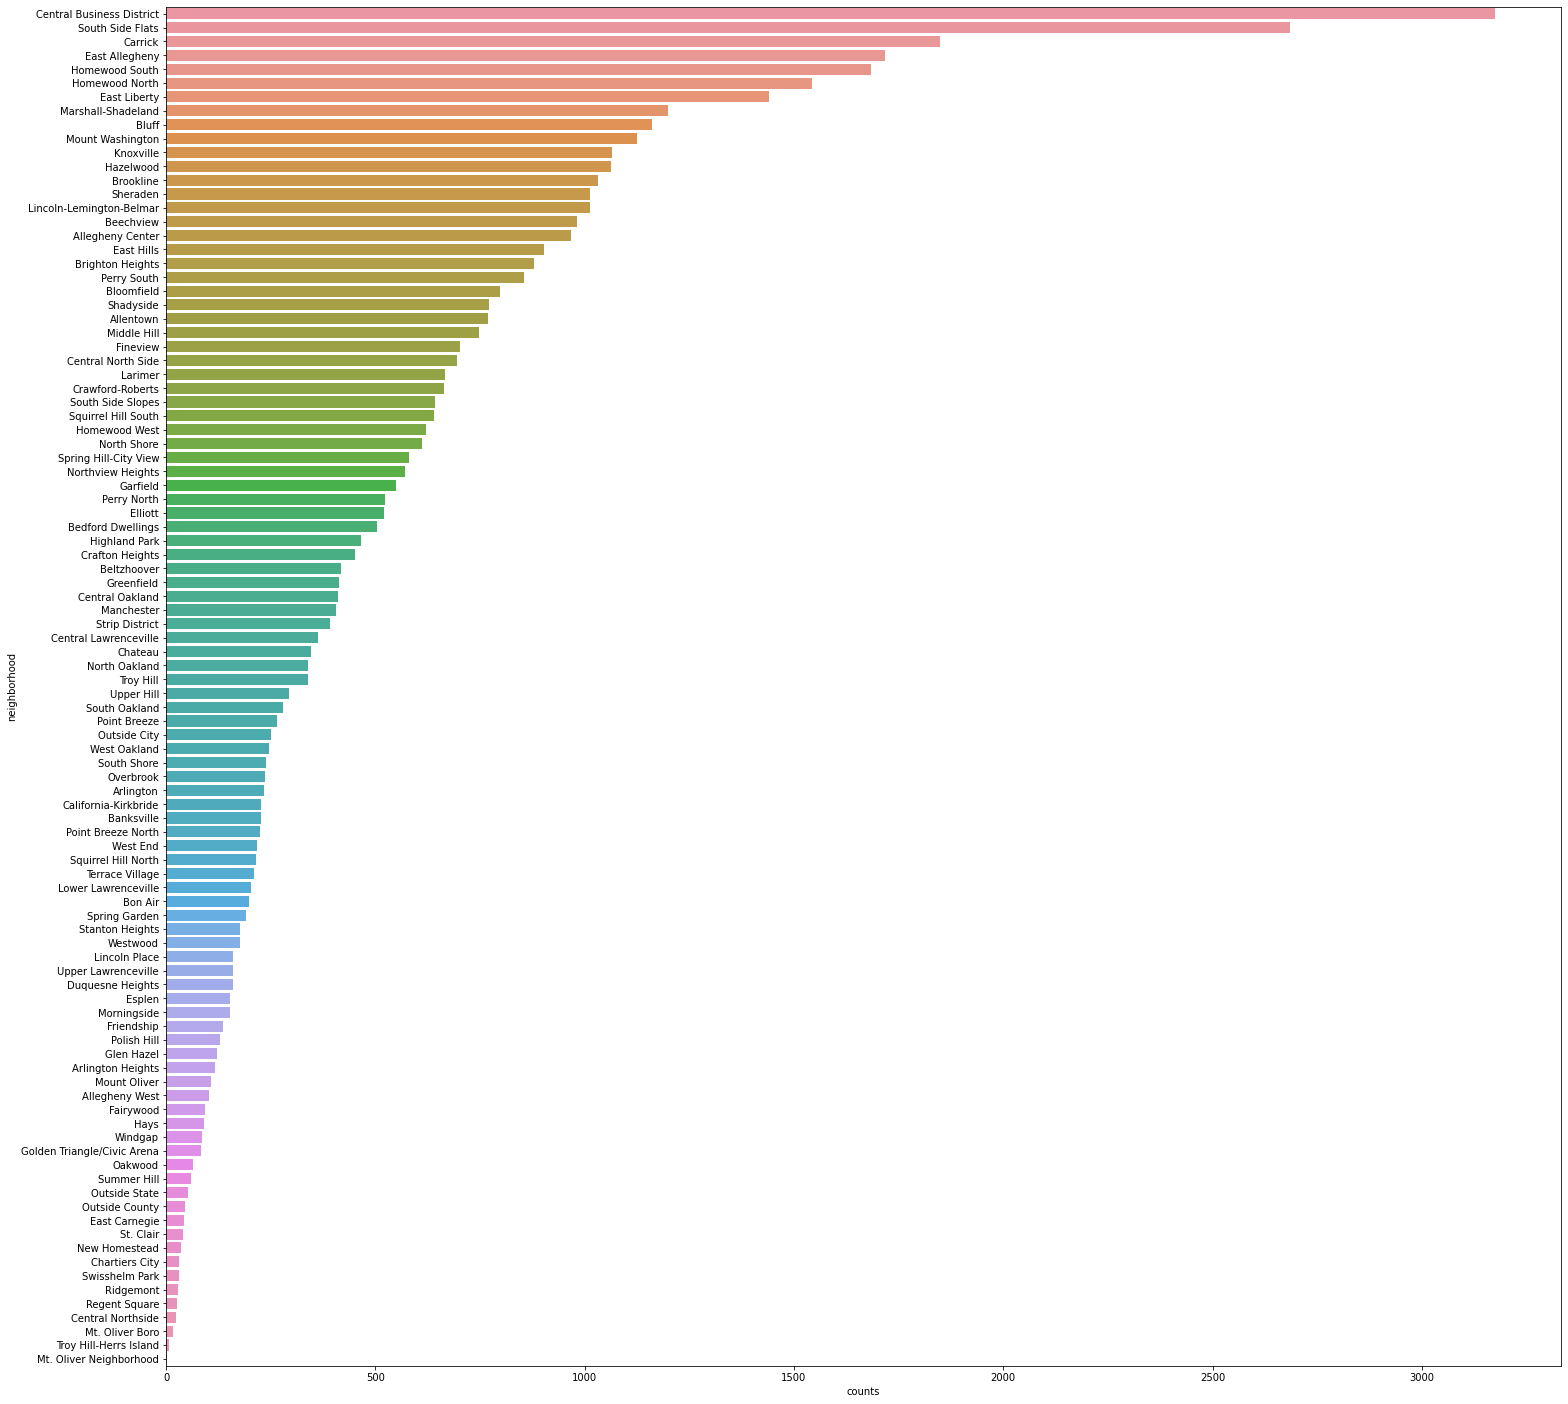

In [46]:
#Count number of crimes in each neighborhood and display as bar chart
tally = arrests['INCIDENTNEIGHBORHOOD'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
tally.sort_values(by='counts', ascending=True)
#print(tally.plot.bar(x='neighborhood', y='counts', figsize=(25,2), width=0.5, position=1, fontsize=14))
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)

# Plot arrests by neighborhood into bar chart.
sns.barplot(x = "counts", 
            y = "neighborhood", 
            ax=ax, 
            data=tally, 
            orient="h", 
            order=tally.sort_values('counts', ascending = False).neighborhood)

In [29]:
#Print neighborhoods with smallest arrests
print("Neighborhood with least amount of arrests: \n ",tally.nsmallest(5, ['counts']))

Neighborhood with least amount of arrests: 
                 neighborhood  counts
97  Mt. Oliver Neighborhood       2
96   Troy Hill-Herrs Island       6
95          Mt. Oliver Boro      17
94        Central Northside      23
93            Regent Square      27


--------------------------------------------------------------------------------------------------------------------------

### Gun Seizures

My project's metric for the best neighborhood is safety. The safer the neighboorhood the better it is. I chose to focus on gun seizures by police in Pittsburgh neighborhoods. The neighborhoods with a lower gun seizure rate are safer as less guns are being used for crimes.### Gun Seizures



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
guns = pd.read_csv('GunSeizures.csv')
gun=guns.dropna()
gun.head(10)

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
5,"1900 BLOCK 5TH AVE PITTSBURGH, PA 15219",1,0,1,0,0,0,2015,1,0,Westwood,2.0,28.0,4.200356e+10,5.0,6,1-18,40.435984,-80.052042
6,"400 BLOCK S NEGLEY AVE PITTSBURGH, PA 15232",1,0,1,0,0,0,2015,1,1,East Liberty,9.0,11.0,4.200311e+10,2.0,5,3-8,40.466771,-79.928240
7,"5200 BLOCK DRESDEN WAY PITTSBURGH, PA 15201",2,0,2,0,0,0,2015,1,1,Upper Lawrenceville,7.0,10.0,4.200310e+10,2.0,2,3-5,40.480147,-79.954014
8,"1100 BLOCK GRAND AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,1,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,1,1-14,40.474986,-80.027528
9,"1600 BLOCK FALLOWFIELD AVE PITTSBURGH, PA 15216",1,0,1,0,0,0,2015,1,1,Beechview,4.0,19.0,4.200319e+10,5.0,6,4-28,40.410487,-80.023969
10,"8600 BLOCK BRICELYN ST PITTSBURGH, PA 15221",1,0,1,0,0,0,2015,1,1,East Hills,9.0,13.0,4.200313e+10,2.0,5,3-17,40.457865,-79.874359


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87],
 <a list of 88 Text major ticklabel objects>)

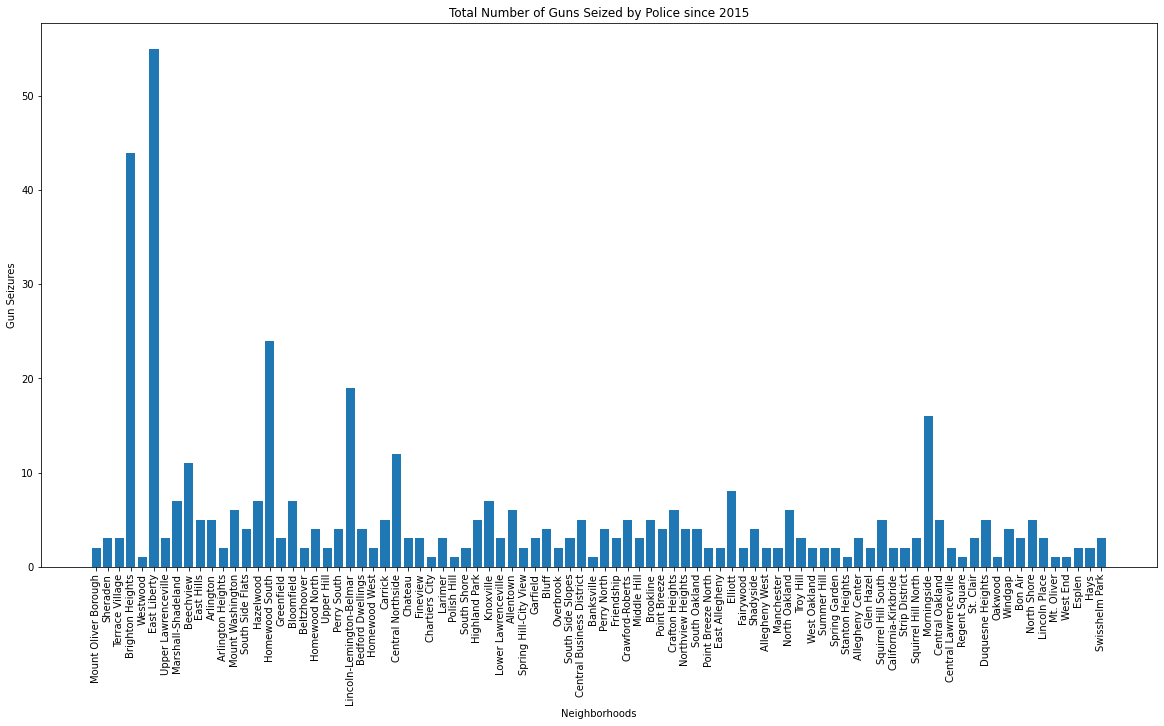

In [31]:
plt.figure(figsize=(20,10))
plt.bar(x=gun['neighborhood'],
        height=gun['total_count'])
plt.title('Total Number of Guns Seized by Police since 2015')
plt.xlabel('Neighborhoods')
plt.ylabel('Gun Seizures')
plt.xticks(rotation=90)

In [32]:
gun.describe()

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,council_district,ward,tract,public_works_division,latitude,longitude
count,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3.260000e+03,3260.000000,3260.000000,3260.000000
mean,1.269632,0.025460,0.939571,0.157669,0.091411,0.055521,2017.868712,6.278528,3.172086,5.189877,16.482515,4.200323e+10,2.785890,40.446086,-79.971055
std,1.530301,0.292531,0.910728,0.411166,0.608511,0.276385,1.969685,3.301979,1.916199,2.845595,7.905549,1.869363e+05,1.503249,0.022957,0.050179
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,40.366543,-80.082487
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2016.000000,3.000000,2.000000,3.000000,12.000000,4.200312e+10,2.000000,40.428834,-80.006991
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2018.000000,6.000000,3.000000,6.000000,16.000000,4.200318e+10,2.000000,40.453185,-79.981958
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,9.000000,5.000000,9.000000,23.000000,4.200327e+10,3.000000,40.461881,-79.928275
max,55.000000,14.000000,30.000000,6.000000,22.000000,5.000000,2021.000000,12.000000,6.000000,9.000000,32.000000,4.200398e+10,6.000000,40.498787,-79.867195


The data indicates that the minimum number of gun seizures in any neighborhood is 1. That means that neighboorhoods with 1 gun seizure are the safest since gun violence is not prevalant. Either there are not many guns in these neighborhoods, or at the very least there are not many guns being used to commit crimes. In either case, these neighborhoods are the safest to live in according to this metric. The safest neighborhoods with only 1 gun seizures can be seen on the graph which are Westwood, Chartiers City, Polish Hill, Banksville, Stanton Heights, Regent Square, Oakwood, Mt Oliver, and West Ends. This conclusion is also backed by https://newsinteractive.post-gazette.com/homicide/ which tracks the number of homicides in each neighborhood. When filtered to show the number of shootings throughout the years, a clear correlation is made where the neighorhoods with low gun seizure rates also have a low amount of gun related homicides(around 2 or less). Where neighborhoods with high gun seizure rates are shown to have lots of gun relate homicides for example Brighton Heights which had 13 shootings. But, one limitation with this dataset is the actual amount of gun seizures in each neighborhood. The amount of policing heavily affects the data as neighborhoods with low policing are most likely going to have fewer gun seizres than neighborhoods with high policing.

--------------------------------------------------------------------------------------------------------------------------

### Median Home Values

#### This part of the notebook will show us which neighborhoods have the highest median home value prices in Pittsburgh. 

##### Loading the csv file

In [33]:
# Let's read the csv file
url = 'https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/9890875b-c1d1-4e64-8fc9-a4a8dc433745/download/housing.csv'
df = pd.read_csv(url)

# Dropping any rows that do not have a home price
df.dropna(inplace=True)

##### Since the data of the home value prices are from 2010, we will need to adjust all the prices for inflation

In [34]:
# Looking at only the median home value column
df.iloc[0:, 21:22].head(5)

,Median Home Value (2010)
1,"$123,600"
2,"$42,200"
3,"$44,200"
5,"$110,900"
6,"$81,100"


##### But first, we need to convert every home value into a floating point number since it is currently of the string data type

In [35]:
# temp_list will carry the converted home values into floating point numbers which will be then added to a new dataframe
temp_list = []

# Getting the home values that are going to be converted
prices = df["Median Home  Value (2010)"]


# Iterating through every value in the column. We are also stripping the "$" and "," characters so it is just the integers
for value in prices.iteritems():
    x = str(value[1])
    x = x.strip('$')
    x = x.replace(',', '')
    temp_list.append(float(x))

    
# Now creating a dictionary that will hold two columns: the list of neighborhoods and its associated median home value price    
d = {'Neighborhood': df["Neighborhood"], 'Median Home Value (2010)': temp_list}


# Creating the data frame that will hold the two columns
home_price_df = pd.DataFrame(data=d)

home_price_df.head() # Prices are now floating point numbers

,Neighborhood,Median Home Value (2010)
1,Allegheny West,123600.0
2,Allentown,42200.0
3,Arlington,44200.0
5,Banksville,110900.0
6,Bedford Dwellings,81100.0


##### Now that we have the median home value prices for each neighborhood in the correct format, we can adjust it for inflation
- The formula for calculating the inflation rate since a given year: CPI in XXXX / CPI in YYYY
- The CPI is the consumer price index which is the price of a weighted average market basket of consumer goods and services purchased by households.
- CPI in 2010: 216.253, CPI in 2021: 279.341
- Source: https://www.in2013dollars.com/Housing/price-inflation/

In [36]:
# 279.341 / 216.253 = 1.292
inflation = 1.292

# For every value in the Home Value column, we are applying a lambda function 
# to it which just multiplies the value by 1.292
home_price_df["Median Home Value (2010)"] = home_price_df["Median Home Value (2010)"].apply(lambda x: x * inflation)


home_price_df.head() # The prices now reflect the median home value in 2021 for each neighborhood in Pittsburgh

,Neighborhood,Median Home Value (2010)
1,Allegheny West,159691.2
2,Allentown,54522.4
3,Arlington,57106.4
5,Banksville,143282.8
6,Bedford Dwellings,104781.2


##### Let's rename the home value column to clarify that it has been adjusted for inflation

In [37]:
home_price_df = home_price_df.rename(columns={"Median Home Value (2010)": "Median Home Value (2010) Adjusted"})
original = home_price_df
home_price_df.head(2)

,Neighborhood,Median Home Value (2010) Adjusted
1,Allegheny West,159691.2
2,Allentown,54522.4


##### Now let's load a map of Pittsburgh. We are going to need to feed it data since it only shows us the layout of the city

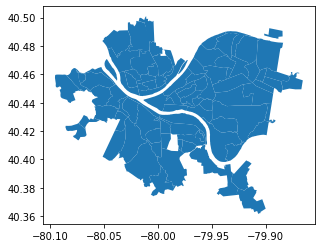

In [38]:
neighborhoods = gpd.read_file('Neighborhoods_.shp') # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

##### Now we are merging the data of the home value prices from the home_price_df dataframe to the geopandas dataframe

In [39]:
# Merging the two dataframes
home_value_map = neighborhoods.merge(home_price_df, how='left', left_on='hood', right_on='Neighborhood')

# looking to confirm if it merged correctly
home_value_map[['hood','Median Home Value (2010) Adjusted','geometry']].head()

,hood,Median Home Value (2010) Adjusted,geometry
0,Central Oakland,186500.2,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,352716.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,78941.2,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,122223.2,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,209045.6,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


##### Now let's plot the map with our data on it!

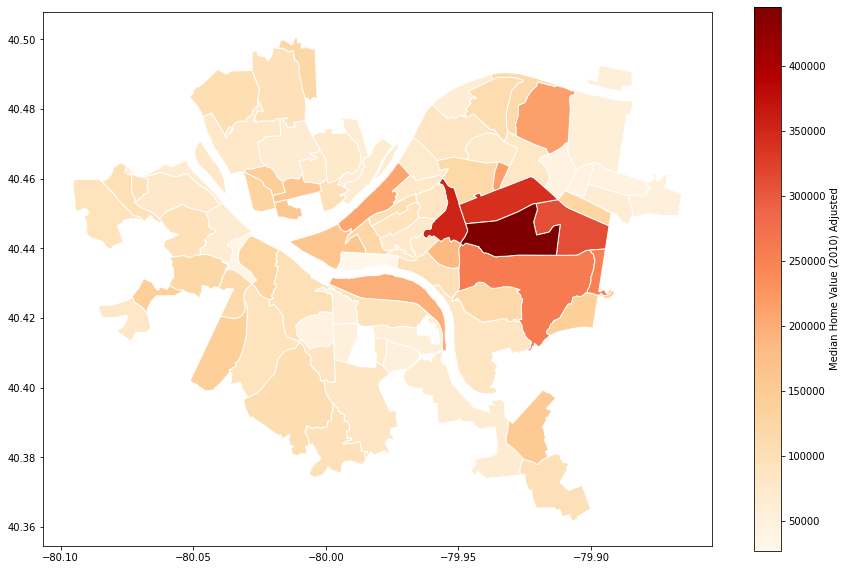

In [40]:
home_value_map.plot(column='Median Home Value (2010) Adjusted', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Median Home Value (2010) Adjusted"}, # label the legend
               figsize=(15, 10),         # set the size
               )

##### Now that we can see what areas have the highest median home value, we need to know the names of those neighborhoods

##### Let's make a barplot using seaborn

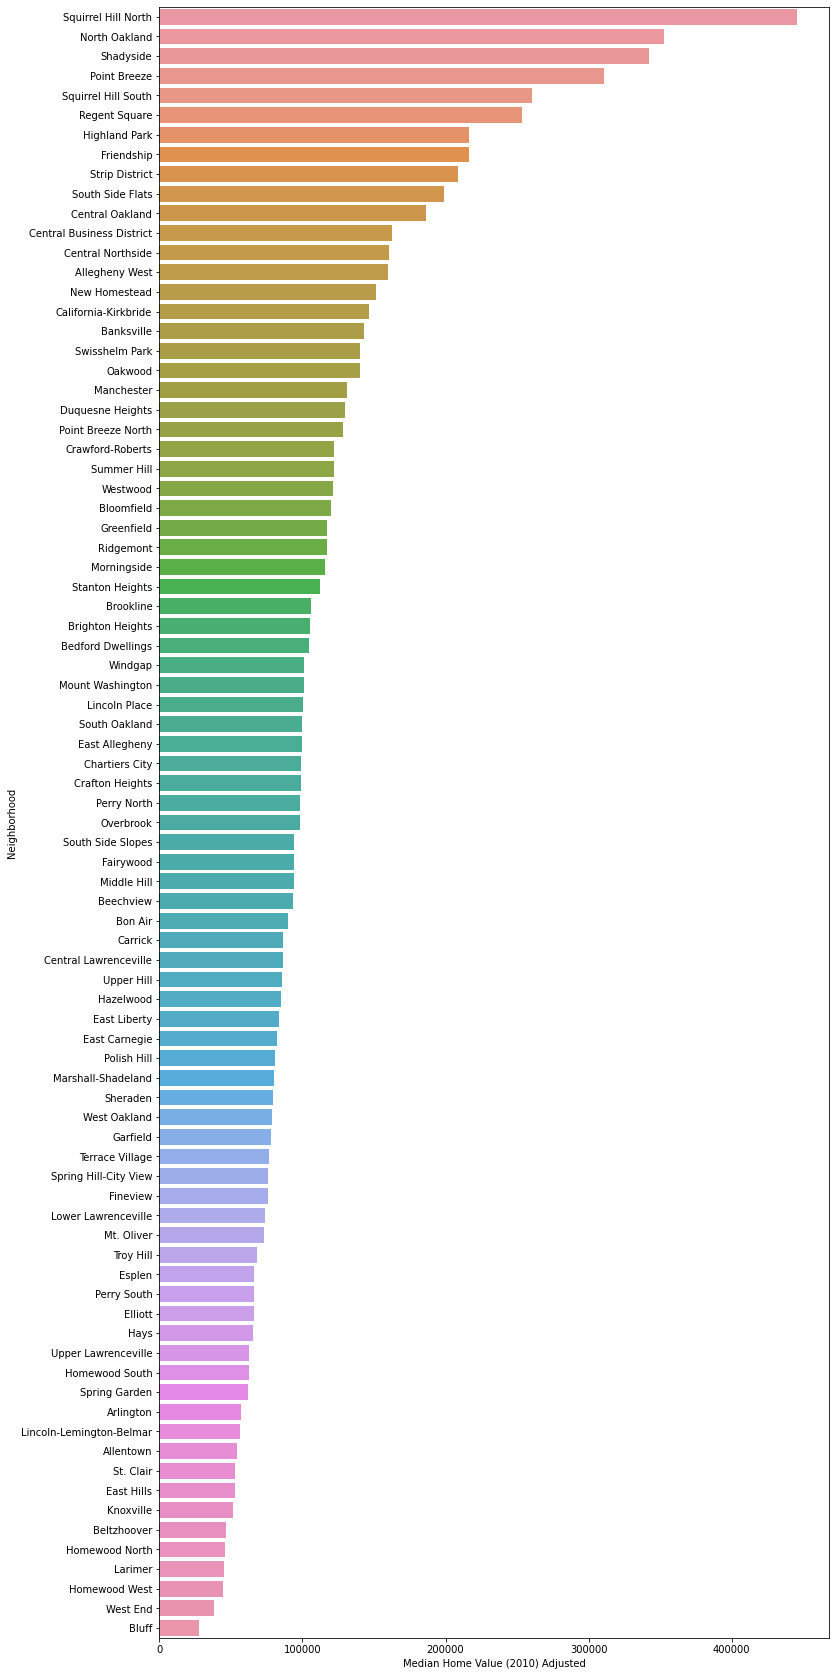

In [41]:
fig_dims = (12, 30)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.barplot(x="Median Home Value (2010) Adjusted", # x axis label
                 y="Neighborhood", # y axis label
                 ax=ax, # figsizes
                 data=original, # data we want to show
                 orient="h", # orientation of the graph
                 order=home_price_df.sort_values("Median Home Value (2010) Adjusted", 
                 ascending = False).Neighborhood) # Sorting the values from greatest to least

#### Conclusion:

The median home value of a neighborhood can mean many different things. I will present to you three reasons what a median home value might represent and why it makes a particular neighborhood desirable.

1. Location
 - A high median home value of a particular neighborhood could imply that its location / surroundings are favorable. For example, the houses in the neighborhood are near many businesses, hospitals, schools, and other franchises; this also implies high job availability.
 

2. Condition of the Neighborhood
 - A high median home value can also imply that the condition is desirable. This can mean the neighborhood is clean and the surrounding homes are in good condition; the neighborhood might look appealing. Or a high home value means the neighborhood has a good reputation (example: it might be safe).


3. Houses are Desirable
 - The most obvious reason a neighborhood has a high median home value is because the houses themelves are in good quality, newly built, or renovated. 
 
However, there are some limitations with the dataset. For instance, the data is 11 years old and adjusting the prices for inflation does not guarantee all the neighborhoods' median home values prices have increased. But, the general concept is that home values tend to increase over time and only decrease during recessions and other disasters.

In [42]:
print("The candidates for the best neighorhood in Pittsburgh are: \n")

home_price_df.sort_values(by='Median Home Value (2010) Adjusted', ascending=False).head(10)

The candidates for the best neighorhood in Pittsburgh are: 



,Neighborhood,Median Home Value (2010) Adjusted
75,Squirrel Hill North,445610.80
55,North Oakland,352716.00
67,Shadyside,342199.12
62,Point Breeze,310467.60
76,Squirrel Hill South,260208.80
65,Regent Square,253619.60
39,Highland Park,216280.80
33,Friendship,216151.60
79,Strip District,209045.60
71,South Side Flats,198645.00


--------------------------------------------------------------------------------------------------------------------------

### Conclusion

Based on the metrics above, we have concluded that the best neighborhood to live in Pittsburgh is Regent Square. In terms of arrests, it places 9th out of 10, with a low amount of 27 arrests. Regent Square is also tied with a few neighborhoods (North Oakland, Shadyside, and Point Breeze) for the lowest amount of gun seizures with only one gun seized by police. From these two figures, we can conclude that there is a low crime rate in this neighborhood and there should be no worries about the safety in Regent Square. It also has the 5th highest median home value with a value of $253,619 per house. The high value implies the houses, surrounding area, and condition of the neighborhood are favorable and appealing, making Regent Square an ideal place to live. The data shows that the neighborhood is safe to live in and will also provide a high qualifty of life. These two factors combined makes it the best neighborhood in Pittsburgh.

Neighborhood |Arrests |Gun Seizures |Median Home Value
-----|-----|-----|-----|
Squirrel Hill North|215|  3  |445610.80
North Oakland|340| 1  |352716.00
Shadyside|771|  1 |342199.12
Point Breeze|265| 1  |310467.60
Squirrel Hill South|639| 4 |260208.80
Regent Square|27| 1 |253619.60
Highland Park|465|  4  |216280.80
Friendship|136| 3  |216151.60
Strip District|391| 2 |209045.60
South Side Flats|26| 3 |198645.00

-------------------------------------------------------------------------------------------------------------------------------------------